ValueError: not enough values to unpack (expected 2, got 0)

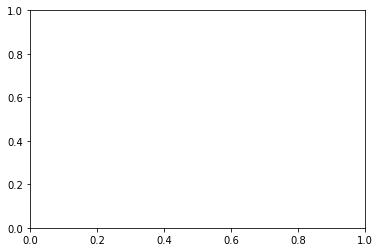

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def reg_cmap():
 iname = 'jet'  #原来的cmap
 oname = 'dist'     #新注册的cmap名字
 low = 0.1         #原cmap保留范围
 high = 1.0

 #(position, [r,g,b,a] or #rrggbb)
 special = [(0,[1,1,1,0])]         #插入的颜色点

 cmap = plt.get_cmap(iname)
 N = int((high - low) * 256)
 values = np.linspace(low,high,N)
 colors = cmap(values)
 #print(colors)
 colorlist = [(values[i],colors[i]) for i in range(N)]
 colorlist = special + colorlist
 #print(colorlist)
 cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
 #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
 plt.cm.register_cmap(cmap=cmap)
 return cmap
cmap=reg_cmap()
plt.pcolormesh(cmap)
plt.show()
plt.colorbar()

KeyError: 'right2'

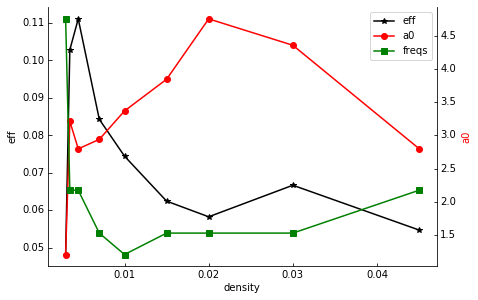

In [10]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np

def draw(label=[],lim=[],a=[],b=[],c=[],d=[],e=[]):
        fig = plt.figure(1) #定义figure，（1）中的1是什么
        ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

        #parasite addtional axes, share x
        ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
        ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
        ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
        ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

        #append axes
        ax_cof.parasites.append(ax_temp)
        ax_cof.parasites.append(ax_load)
        ax_cof.parasites.append(ax_cp)
        ax_cof.parasites.append(ax_wear)



        #invisible right axis of ax_cof
        ax_cof.axis['right'].set_visible(False)
        ax_cof.axis['top'].set_visible(False)
        ax_temp.axis['right'].set_visible(True)
        ax_temp.axis['right'].major_ticklabels.set_visible(True)
        ax_temp.axis['right'].label.set_visible(True)

        #set label for axis
        ax_cof.set_ylabel(label[1])
        ax_cof.set_xlabel(label[0])
        ax_temp.set_ylabel(label[2])
        ax_load.set_ylabel(label[3])
        ax_cp.set_ylabel(label[4])
        ax_wear.set_ylabel('Wear')

        load_axisline = ax_load.get_grid_helper().new_fixed_axis
        cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
        wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

        #ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
        #ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
        #ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

        fig.add_axes(ax_cof)

        ''' #set limit of x, y
        ax_cof.set_xlim(0,2)
        ax_cof.set_ylim(0,3)
        '''
        #a=[0.5,1,2,3,4]
        #eff=[0.000302201,0.072720329,0.074453714,0.044961209,0.039053637]
        #a0=[0.115737848,1.751888201,3.366648682,4.669663941,3.041522723]
        #freqs=[15,9,2.5,3,1.5]

        curve_cof, = ax_cof.plot(a,b, 'c*-',label=label[1], color='black')
        #scatter_cof = ax_cof.scatter(a, b,label=label[1], color='black')
        
        curve_temp, = ax_temp.plot(a, c, 'co-',label=label[2], color='red')
        #scatter_temp = ax_temp.scatter(a, c, label=label[2], color='red',marker='v')
        
        curve_load, = ax_load.plot(a,d, 'cs-',label=label[3], color='green')
        #scatter_load = ax_load.scatter(a, d, label=label[3], color='green',marker=',')
        #curve_cp, = ax_cp.plot(a, e, label=label[4], color='pink')
        #curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


        #ax_temp.set_ylim(0,4)
        #ax_load.set_ylim(0,4)
        #ax_cp.set_ylim(0,50)
        #ax_wear.set_ylim(0,30)

        ax_cof.legend()

        #轴名称，刻度值的颜色
        #ax_cof.axis['left'].label.set_color(ax_cof.get_color())
        ax_temp.axis['right'].label.set_color('red')
        ax_load.axis['right2'].label.set_color('green')
        ax_cp.axis['right3'].label.set_color('pink')
        ax_wear.axis['right4'].label.set_color('blue')

        ax_temp.axis['right'].major_ticks.set_color('red')
        ax_load.axis['right2'].major_ticks.set_color('green')
        ax_cp.axis['right3'].major_ticks.set_color('pink')
        ax_wear.axis['right4'].major_ticks.set_color('blue')

        ax_temp.axis['right'].major_ticklabels.set_color('red')
        ax_load.axis['right2'].major_ticklabels.set_color('green')
        ax_cp.axis['right3'].major_ticklabels.set_color('pink')
        ax_wear.axis['right4'].major_ticklabels.set_color('blue')

        ax_temp.axis['right'].line.set_color('red')
        ax_load.axis['right2'].line.set_color('green')
        ax_cp.axis['right3'].line.set_color('pink')
        ax_wear.axis['right4'].line.set_color('blue')
        #plt.savefig('fig/'+str(label[0])+'.png',dpi=160)
        #fig.set_size_inches(14, 12)
        #fig.savefig('./fig/'+str(label[0])+'.png',format='png',dpi=160)
        fig.savefig('./fig/'+str(label[0])+'.png',format='png',bbox_inches = 'tight')
        plt.show()

draw(label=['density','eff','a0','freqs','k'],
a=[3.00E-03,3.50E-03,4.50E-03,7.00E-03,1.00E-02,1.50E-02,2.00E-02,3.00E-02,4.50E-02],
b=[0.048196401,0.102871273,0.111111008,0.084301947,0.074453714,0.062449377,0.058270294,0.066694436,0.054734698],
c=[1.207555351,3.211454872,2.796335132,2.939103325,3.366648682,3.843410143,4.750858633,4.354245314,2.799477453],
d=[8,4,4,3,2.5,3,3,3,4])

draw(label=['w0','eff','a0','freqs','k'],
a=[4.5,5,6,7,8,10,12,16],
b=[0.03889826,0.080578454,0.090913121,0.107002355,0.08934692,0.081585626,0.074453714,0.069679382],
c=[1.214198597,2.008545269,2.85962683,3.165383979,2.326567235,2.754067966,3.366648682,3.808748841],
d=[11,11,4,4,4,3,2.5,3])

draw(label=['duration','eff','a0','freqs','k'],
a=[2,4,6,10,14,20],
b=[0.081648849,0.132533624,0.103799065,0.074453714,0.062908131,0.031095136],
c=[1.579653934,2.969069743,2.868545239,3.366648682,4.033954819,2.791538973],
d=[10,5,4,2.5,2.5,3,])

draw(label=['laser_a0','eff','a0','freqs','k'],
a=[0.5,1,1.5,2,2.5,3,4],
b=[0.000302201,0.072720329,0.0900501,0.074453714,0.062371872,0.044961209,0.039053637],
c=[0.115737848,1.751888201,2.72189456,3.366648682,2.870233644,4.669663941,3.041522723],
d=[15,9,4,2.5,2,3,1.5])



In [2]:
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'monospace',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 1
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))

<Figure size 432x288 with 0 Axes>

In [3]:
import tvtk

In [4]:
from tvtk.api import tvtk

TypeError: function() argument 1 must be code, not str

In [6]:
from tvtk.api import tvtk
cs = tvtk.ConeSource()
cs.resolution = 36
m = tvtk.PolyDataMapper()
m.set_input_data(cs.output)
a = tvtk.Actor()
a.mapper = m
p = a.property
p.representation = 'w'
print(p.representation)

TypeError: function() argument 1 must be code, not str

In [ ]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('eff')
ax_cof.set_xlabel('Distance (m)')
ax_temp.set_ylabel('Temperature')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

#ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''

eff=[0.048196401,0.102871273,0.111111008,0.084301947,0.074453714,0.062449377,0.058270294,0.066694436,0.054734698]
density=[3.00E-03,3.50E-03,4.50E-03,7.00E-03,1.00E-02,1.50E-02,2.00E-02,3.00E-02,4.50E-02]
a0=[1.207555351,3.211454872,2.796335132,2.939103325,3.366648682,3.843410143,4.750858633,4.354245314,2.799477453]
freqs=[8,4,4,3,2.5,3,3,3,4]
k=[1.450407414771374,1.5666190603635624,1.7763790426695734,2.215533922238344,2.6480695288101104,3.2432095744985245,3.74493584175019,4.586590965874088,5.617403762625285]


name='${e_k}$  '
curve_cof= ax_cof.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
position=fig.add_axes([0.65+0.02, 0.8+0.02, 0.2, 0.02])

cbar=fig.colorbar(curve_cof,ax=ax_cof,ticks=np.linspace(350, 550,3),fraction=0.015,cax=position,orientation='horizontal')
#cbar=fig.colorbar(curve_cof,ax=ax_cof)
cbar.set_label(name+r'$[meV]$')#,fontdict=font)

curve_temp, = ax_temp.plot(density, a0, label="a0", color='red')





#curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


#ax_temp.set_ylim(0,4)
#ax_load.set_ylim(0,4)
#ax_cp.set_ylim(0,50)
#ax_wear.set_ylim(0,30)

ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

plt.show()

In [52]:
n=300
savedir = 'txt/a2_n1_T6_w8/' + str(n)
print(savedir)
####import sdf data#####
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

import sdf

import scipy.fftpack as fftpack
import numpy as np
#data=sdf.read('data/2800.sdf',dict=True)
#bz=data['Electric Field/Ey'].data[:,:,int(188/2)]
#ne=data['Derived/Number_Density/electron1'].data[:,:,int(188/2)]

bz=np.loadtxt(savedir+'_bz.txt')
ne=np.loadtxt(savedir+'_ne.txt')

print(bz.shape)
ne_y0=ne[:,int(188/2)]
bz_y0=bz[:,int(188/2)]
hx = fftpack.hilbert(bz_y0)
hy = np.sqrt(bz_y0**2+hx**2)

txt/a2_n1_T6_w8/3000
(1000, 188)


In [2]:
####import sdf data#####
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
n=2800
import sdf
import scipy.fftpack as fftpack
import numpy as np
data=sdf.read('data/2800.sdf',dict=True)
ey=data['Electric Field/Ey'].data
ey.tofile("data/ey.bin")
ey_shape=[1000,188,188]
np.savetxt('data/ey_shape.txt',ey_shape)
np.savetxt('data/ey.txt',ey)
bz=data['Electric Field/Ey'].data[:,:,int(188/2)]
ne=data['Derived/Number_Density/electron1'].data[:,:,int(188/2)]
ne_y0=ne[:,int(188/2)]
bz_y0=bz[:,int(188/2)]
hx = fftpack.hilbert(bz_y0)
hy = np.sqrt(bz_y0**2+hx**2)

ValueError: Expected 1D or 2D array, got 3D array instead

In [54]:
import numpy
import sdf
import constant as const
import scipy.signal as signal
import numpy as np
pi=3.14
def E_x_y_zxx(a):        
    #sdfdir=const.sdfdir +str(a).zfill(const.filenumber)+".sdf"
    #data=sdf.read(sdfdir,dict=True)
    Ex=data["Electric Field/Ex"].data[:,:,int(188/2)]
    Ex_y0=Ex[:,int(188/2)]
    Ey=data["Electric Field/Ey"].data[:,:,int(188/2)]
    Ey_y0=Ey[:,int(188/2)]
    k,x,zxx=signal.stft(Ey_y0,fs=2*pi/const.delta_x,nperseg=const.nperseg)
    zxx=abs(zxx)
    index = np.unravel_index(zxx.argmax(),zxx.shape)
    k_x=np.ones(const.Nx)*k[index[0]]
    for i in range(0,const.Nx):
        x=i
        a=zxx[...,int(x/const.nperseg)]
        a=a.tolist()
        a[0]=0
        max_index=a.index(max(a))
        if max(a) > 0.2 * zxx[index[0]][index[1]]:
            k_x[i]=(k[max_index])
    ne=data['Derived/Number_Density/electron1'].data
    ne_y0=ne[:,int(const.Ny/2),int(const.Ny/2)]

    return [Ex_y0,Ey_y0,zxx,ne_y0,k_x]
def k(x,zxx):
    a=zxx[...,int(x/const.nperseg)]
    a=a.tolist()
    a[0]=0
    max_index=a.index(max(a))
    # index=(max_index*pi)/(len(a)*const.delta_x)
    index =  (pi/const.delta_x)/len(a) * max_index
    #print "max(k_x),max_index,len(k_x),index",max(a),max_index,len(a),index # ,index
    return index
def scalar_p(Ex_y0):
    scalar_p=0
    e=1.6e-19
    c=3e8
    m0=9.1e-31
    import constant as const
    a=np.zeros(const.Nx)
    x=const.Nx - 1
    for i in range(0,x+1):
        scalar_p=Ex_y0[x-i]*const.delta_x+scalar_p 
    #a.append(e*scalar_p/(m0*c**2))   
        a[x-i]=e*scalar_p/(m0*c**2)  
    #   print  'n_scalar',a
    return a
def wp_2(x,ne_y0):
    ne=ne_y0[x]
    #ne=1e25
    e=1.6e-19
    m0=9.1e-31
#print "ne",ne
    w_p_2=ne*e**2/(m0*8.85e-12)
#print "w_p",w_p_2
    return w_p_2
def ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0,k_x):
    c=3e8
    wp_x_2=wp_2(x,ne_y0)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
    p_y0_x=p_y0[x]
#print "scalar",p_y0_x
#k_x=k(x,zxx)
    k_x=k_x[x]
    w0=k_x*c/1
#print "w0",w0
    a=wp_x_2/(1+p_y0_x)
    b=(k_x*c)**2
    c=-(k_x*c)**2
    #print("a,b,c",a,b,c)
    result=np.roots([a,b,c])
    #print(result)
    return np.roots([a,b,c])
def ref_a(a):   
    ref=[]
    Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(a)
    x=const.Nx
    global p_y0
    p_y0=scalar_p(Ex_y0)
    for i in range(0,1000):
        index=ref_index(i,Ex_y0,Ey_y0,zxx,ne_y0,k_x)
        #print("c",c)
        s_a= type(index) == numpy.ndarray
        #print("type",a)
        if type(index) == numpy.ndarray:
            index=index[-1]
        #print("c[-1]",c)
        ref.append(index)
    #print("ref:",type(ref[0]))
    return ref
#def help():
#print "func.ref_a(a)"
#print "a,x=1,1"
#print "Ex_y0,Ey_y0,zxx,ne_y0,k_x=func.E_x_y_zxx(a)"
#print "global p_y0"
#print "func.p_y0=scalar_p(Ex_y0)"    
#print "func.ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0)"
c=3e8
'''
x=2
Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(2800)
print(zxx)
wp_x_2=wp_2(x,ne_y0)
#print(wp_x_2)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
p_y0_x=p_y0[x]
#print(p_y0_x)
#print "scalar",p_y0_x
#k_x=k(x,zxx)
k_x=k_x[x]
#print(k_x)
w0=k_x*c/1
#print "w0",w0
a=wp_x_2/(1+p_y0_x)
#print('a',a)
'''
x_ref=ref_a(2800)
x_ref=np.array(x_ref)
print(x_ref)

[0.94975175 0.93305764 0.95678628 0.97233175 0.95901436 0.96105513
 0.96373417 0.97839754 0.96421828 0.9725858  0.98147492 0.95960348
 0.97860165 0.97817374 0.97705433 0.97829483 0.97066583 0.98790351
 0.99170141 0.99381919 0.98169505 0.9797169  0.99001561 0.97719409
 0.97311019 0.97516755 0.97768394 0.98867777 0.98365859 0.97339205
 0.97229932 0.976896   0.98397247 0.9859637  0.97622965 0.97358294
 0.96616078 0.96302769 0.97736705 0.97515013 0.97100919 0.98459124
 0.96904595 0.97141174 0.9771366  0.97648572 0.98674367 0.98957547
 0.96994976 0.95951875 0.97186349 0.97385615 0.98472188 0.98639773
 0.99237158 0.97509961 0.98155844 0.96542626 0.97086235 0.96676524
 0.97428852 0.98404773 0.98287609 0.98134425 0.97986706 0.9679299
 0.96694364 0.97153901 0.95049166 0.9635811  0.97476709 0.97980846
 0.98222423 0.97606442 0.96573347 0.97652043 0.96221737 0.95595278
 0.95856386 0.95850123 0.96306854 0.96639683 0.97001031 0.9594735
 0.9670846  0.95349953 0.96195323 0.9544859  0.94837112 0.958065

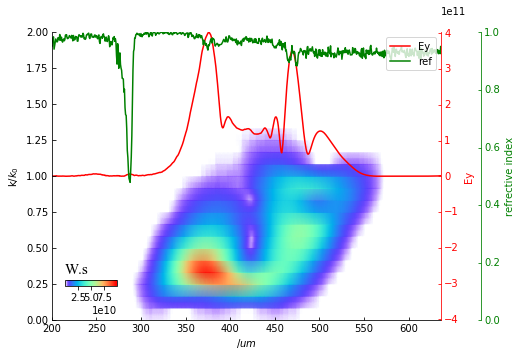

In [57]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6

fig = plt.figure(1) 
#ax_cof = fig.add_subplot(121)

#fig = plt.figure(figsize=[9,6]) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0,0.9, 1])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('k/${k_0}$')
ax_cof.set_xlabel('${/um}$')
ax_temp.set_ylabel('Ey')
ax_load.set_ylabel('refrective index')
#ax_cp.set_ylabel('k/${k_0}$')
#ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))

#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

k0=2*3.14/const.lamada
k1=2*3.14/1e-6
fs=2*3.14/const.delta_x/k0
f,t,zxx=signal.stft(bz_y0,fs=2*3.14/const.delta_x,nperseg=200,noverlap=199)

plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256/5))-1.1))))
cmap = plt.get_cmap()

name='${e_k}$  '

curve_cof= ax_cof.pcolormesh(t*2*3.14/1e-6,f/k0,np.abs(zxx),cmap=cmap,shading='gouraud')


curve_temp= ax_temp.plot(np.linspace(0,60*10.6,1000),hy, label="Ey", color='red')
curve_load= ax_load.plot(np.linspace(0,60*10.6,1000),x_ref, label="ref", color='green')

ax_cp.set_ylim((0,2))



#ax_cof.set_ylim((-ne_y0.max(),ne_y0.max()))
ax_temp.set_ylim((-hy.max(),hy.max()))
ax_load.set_ylim((0,1))
ax_cof.set_ylim((0,2))


ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

position=fig.add_axes([0.030, 0.12, 0.12, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.ax.set_title('W.s', loc = 'left', fontdict=font)
#cb.ax.tick_params(labelsize=15)
#plt.tight_layout()
ax_cof.set_xlim((200,636))
plt.show()
fig.savefig('fig/'+str(n)+'_fig3a.png',dpi=400,bbox_inches = 'tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


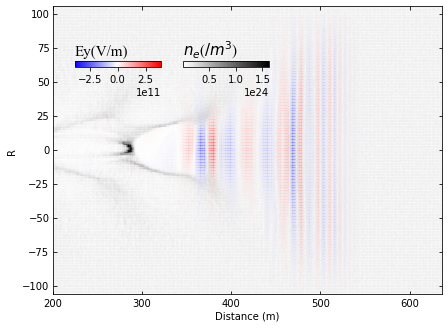

In [58]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 2



fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 1])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes

ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(True)
ax_cof.axis['top'].set_visible(True)
ax_temp.axis['right'].set_visible(False)
ax_temp.axis['right'].major_ticklabels.set_visible(False)
ax_temp.axis['right'].label.set_visible(False)

#set label for axis
ax_cof.set_ylabel('R')
ax_cof.set_xlabel('Distance (m)')

#ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)
###################
########plot########
###################
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:(abs(x/127.5-1)**index))))
cmap1 = plt.get_cmap()
plt.set_cmap(reg_cmap_transparent('binary',create_alpha(lambda x:(np.exp(x/(256))-0.8))))

cmap2 = plt.get_cmap()
name='${e_k}$  '

x=np.linspace(0,60*10.6,1000)
r=np.linspace(-10*10.6,10*10.6,188)
X,R=np.meshgrid(x,r)

curve_cof= ax_cof.pcolormesh(X,R,bz.T,cmap=cm.bwr)
curve_temp= ax_temp.pcolormesh(X,R,ne.T,cmap=cmap2)

curve_cof.set_clim((-bz.max(),bz.max()))

position=fig.add_axes([0.05, 0.79, 0.2, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#cb.ax.tick_params(labelsize=15)
cb.ax.set_title('Ey(V/m)', loc = 'left', fontdict=font)
position2=fig.add_axes([0.3, 0.79, 0.2, 0.02])#位置[左,下,右,上]
cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
cb2.ax.set_title('${n_e}$(${/m^3}$)', loc = 'left',fontdict=font)
#cb2.set_label('n_e(/m^3)',fontdict=font)
#cb2.ax.tick_params(labelsize=15)

ax_cof.tick_params(labelsize=15)
labels = ax_cof.get_xticklabels() + ax_cof.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.tight_layout()


####################################################
ax_cof.set_xlim((200,636))
plt.show()
#fig.savefig('test2.png',dpi=400,bbox_inches = 'tight')
fig.savefig('fig/'+str(n)+'_fig3b.png',dpi=400,bbox_inches = 'tight')

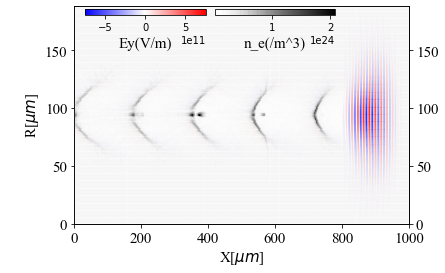

In [62]:
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
fig = plt.figure(1)#figsize=(18,6))
ax = fig.add_subplot(111)
ax2=ax.twinx()
#im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)
####
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:(1-abs(x/127.5-1)))))
cmap1 = plt.get_cmap()
plt.set_cmap(reg_cmap_transparent('binary',create_alpha(lambda x:(np.exp(x/(256))-1))))
cmap2 = plt.get_cmap()
name='${e_k}$  '
####
curve_cof= ax.pcolormesh(bz.T,cmap=cm.bwr)#cmap1)
curve_temp= ax2.pcolormesh(ne.T,cmap=cmap2)

#position=fig.add_axes([0.65+0.02, 0.8+0.02, 0.2, 0.02])

#cbar=fig.colorbar(im,ticks=np.linspace(350, 550,3),fraction=0.015,cax=position,orientation='horizontal')
#cbar.set_label(name+r'$[meV]$',fontdict=font)
#im.set_clim((350,550))
#line=ax2.plot(I,color='black',linewidth=3)
#ax.set_xlim((0,260))
#ax.set_ylim((0,12))

position=fig.add_axes([0.15, 0.85, 0.28, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.set_label('Ey(V/m)',fontdict=font)
position2=fig.add_axes([0.45, 0.85, 0.28, 0.02])#位置[左,下,右,上]
cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
cb2.set_label('n_e(/m^3)',fontdict=font)

###
ax.set_xlabel('X'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\nR'+ '[$\mu m$]',fontdict=font)
#ax2.set_ylabel('Intensity'+'W/${m^2}$',fontdict=font)
#cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

###


plt.show()
#fig.savefig('2d_r.png',dpi=400,bbox_inches = 'tight')


In [83]:
fig,ax=plt.subplots(2,3,1)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  """Entry point for launching an IPython kernel.


ValueError: 1 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

In [2]:
# -- coding: utf-8 --
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#plt.switch_backend('agg')
load_dir="txt/2d/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/2d/freqs.png"
#constant
c       =  3e8
micron  =  1e-6
lamada  =  const.lamada #10.6 * micron 
gridnumber = 1000      #2400
stop    =  4000      #5889
dt_snapshot= 10e-15      #9e-15
dt      =  dt_snapshot*1e15      #fs
x_max   = 60*10.6e-6       #80 * lamada   #60 * lamada #micron
x_min   =  0 * micron
x_end   =  x_max - x_min 
window_start_time =  (x_max - x_min) / c
delta_x =  x_end/gridnumber
t_end   =  stop * dt_snapshot
x_interval=const.x_interval        #10
t_total=1e15*x_end/c         #fs
t_size=t_total/(dt_snapshot*1e15)+1+1           #t_grid_number
######t_size=int(1e15*gridnumber*delta_x/c)+1

if t_end-window_start_time<0:
      xgrid   =  int(gridnumber)
else:
      xgrid   =  int(gridnumber + c*(t_end-window_start_time)/delta_x)
#######

def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256*2))-1.05))))
cmap = plt.get_cmap()
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 2 
#####fft freqs

N0 = t_size
T=t_size*dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
freqs=np.linspace(0,fs/2,int(N0/2)+1)
print(len(freqs))
######
for i in range(0,len(freqs)):
     if freqs[i] > 50:
        index = i
        break;

#freqs=freqs[0:index]

################freqs=np.linspace(0,500,101)
#####time profile
t=np.arange(0,t_size+dt,dt)


#####


#####set x ,y         
print(xgrid*delta_x*1e6/x_interval,delta_x*1e6)
#x=np.arange(int(xgrid*delta_x*1e6/x_interval)+1,delta_x*1e6)
x=np.linspace(0,xgrid*delta_x*1e6/x_interval,int(xgrid/x_interval+1))

#a=float("inf")
#freqs[0]=a
#light=3e8*np.ones(freqs.shape)
#lam=(light/(freqs*1e12))*1e6
X,Freqs=np.meshgrid(x,freqs)
#lamda[1]=0
#lamda[0]=0
#lamda[2]=0
#lamda[3]=0

####transition Xf
Xf=xf.T
#plot
fig,ax=plt.subplots()
###
#Xf=Xf[0:index,...]
###
im=ax.pcolormesh(X,Freqs,Xf,cmap=plt.get_cmap('rainbow'))
fig.colorbar(im,ax=ax)
#fig.savefig('Xf.png',dpi=200)
#set ticker

def x_formatter(x, pos):
        a=delta_x*x*x_interval*1e6
        return  "%d"%int(a)
def freqs_formatter(x, pos):
          
        return  "%d"%int(x)
x_major_locator=int(xgrid/x_interval/5)
x_minor_locator=int(xgrid/x_interval/50)

#y_tick_pos  = np.linspace(0,40,1)
#ax.set_yticks(y_tick_pos)
######
#ax.set_yscale("symlog",basey=2)
#ax.set_xlim((0,2000))
#ax.xaxis.set_major_locator( MultipleLocator(x_major_locator) )
#ax.xaxis.set_major_formatter( FuncFormatter( x_formatter ) )
#ax.xaxis.set_minor_locator( MultipleLocator(x_minor_locator) )
ax.xaxis.set_minor_locator( MultipleLocator(200) )
ax.yaxis.set_minor_locator( MultipleLocator(1) )
#formatter0 = EngFormatter(unit='THz')
#ax.yaxis.set_major_formatter(formatter0)
ax.yaxis.set_major_formatter( FuncFormatter( freqs_formatter ) )
ax.set_xlabel('um')
ax.set_ylabel('Thz')
ax.set_xlim((0,10000))
#print and save
#plt.show()
fig.savefig(savedir,dpi=200)
plt.show()

NameError: name 'color' is not defined

108
10199.532000000001 0.636


<Figure size 432x288 with 0 Axes>

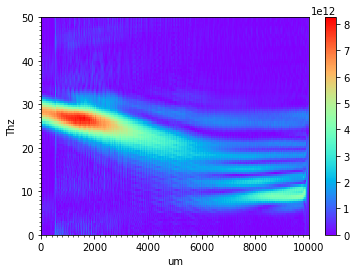

In [23]:
# -- coding: utf-8 --
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#plt.switch_backend('agg')
load_dir="txt/a2_n1_T6_w8/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/a2_n1_T6_w8/freqs.png"
#constant
c       =  3e8
micron  =  1e-6
lamada  =  const.lamada #10.6 * micron 
gridnumber = 1000      #2400
stop    =  3400      #5889
dt_snapshot= 10e-15      #9e-15
dt      =  dt_snapshot*1e15      #fs
x_max   = 60*10.6e-6       #80 * lamada   #60 * lamada #micron
x_min   =  0 * micron
x_end   =  x_max - x_min 
window_start_time =  (x_max - x_min) / c
delta_x =  x_end/gridnumber
t_end   =  stop * dt_snapshot
x_interval=const.x_interval        #10
t_total=1e15*x_end/c         #fs
t_size=t_total/(dt_snapshot*1e15)+1+1           #t_grid_number
######t_size=int(1e15*gridnumber*delta_x/c)+1

if t_end-window_start_time<0:
      xgrid   =  int(gridnumber)
else:
      xgrid   =  int(gridnumber + c*(t_end-window_start_time)/delta_x)
#######

def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256*2))-1.05))))
cmap = plt.get_cmap()
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 2 
#####fft freqs

N0 = t_size
T=t_size*dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
freqs=np.linspace(0,fs/2,int(N0/2)+1)
print(len(freqs))
######
for i in range(0,len(freqs)):
     if freqs[i] > 50:
        index = i
        break;

#freqs=freqs[0:index]

################freqs=np.linspace(0,500,101)
#####time profile
t=np.arange(0,t_size+dt,dt)


#####


#####set x ,y         
print(xgrid*delta_x*1e6/x_interval,delta_x*1e6)
#x=np.arange(int(xgrid*delta_x*1e6/x_interval)+1,delta_x*1e6)
x=np.linspace(0,xgrid*delta_x*1e6/x_interval,int(xgrid/x_interval+1))

#a=float("inf")
#freqs[0]=a
#light=3e8*np.ones(freqs.shape)
#lam=(light/(freqs*1e12))*1e6
X,Freqs=np.meshgrid(x,freqs)
#lamda[1]=0
#lamda[0]=0
#lamda[2]=0
#lamda[3]=0

####transition Xf
Xf=xf.T
#plot
fig,ax=plt.subplots()
###
#Xf=Xf[0:index,...]
###
im=ax.pcolormesh(X,Freqs,Xf,cmap=plt.get_cmap('rainbow'))
fig.colorbar(im,ax=ax)
#fig.savefig('Xf.png',dpi=200)
#set ticker

def x_formatter(x, pos):
        a=delta_x*x*x_interval*1e6
        return  "%d"%int(a)
def freqs_formatter(x, pos):
          
        return  "%d"%int(x)
x_major_locator=int(xgrid/x_interval/5)
x_minor_locator=int(xgrid/x_interval/50)

#y_tick_pos  = np.linspace(0,40,1)
#ax.set_yticks(y_tick_pos)
######
#ax.set_yscale("symlog",basey=2)
#ax.set_xlim((0,2000))
#ax.xaxis.set_major_locator( MultipleLocator(x_major_locator) )
#ax.xaxis.set_major_formatter( FuncFormatter( x_formatter ) )
#ax.xaxis.set_minor_locator( MultipleLocator(x_minor_locator) )
ax.xaxis.set_minor_locator( MultipleLocator(200) )
ax.yaxis.set_minor_locator( MultipleLocator(1) )
#formatter0 = EngFormatter(unit='THz')
#ax.yaxis.set_major_formatter(formatter0)
ax.yaxis.set_major_formatter( FuncFormatter( freqs_formatter ) )
ax.set_xlabel('um')
ax.set_ylabel('Thz')
ax.set_xlim((0,10000))
#print and save
#plt.show()
fig.savefig(savedir,dpi=200)
plt.show()

In [2]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('eff')
ax_cof.set_xlabel('Distance (m)')
ax_temp.set_ylabel('Temperature')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
a0_1=np.loadtxt('txt/2d/a0.txt')
a0_d1=np.loadtxt('txt/2d/a0_distance.txt')
a0_2=np.loadtxt('txt/a2_n1_T6_w8/a0.txt')
a0_d2=np.loadtxt('txt/a2_n1_T6_w8/a0_distance.txt')
eff_1=np.loadtxt('txt/2d/eff.txt')
eff_d1=np.loadtxt('txt/2d/eff_locate.txt')
eff_2=np.loadtxt('txt/a2_n1_T6_w8/eff.txt')
eff_d2=np.loadtxt('txt/a2_n1_T6_w8/eff_locate.txt')

curve_cof, = ax_cof.plot(a0_d1, a0_1,'r--')# ,label="eff", color='black')
scatter_cof = ax_cof.plot(a0_d2, a0_2, 'r-.')#,label="eff2", color='blue')
curve_temp, = ax_temp.plot(eff_d1, eff_1,color='black')#,label="a0", color='red')
curve_load, = ax_temp.plot(eff_d2, eff_2,color='black')#label="freqs", color='green')

#curve_cp, = ax_cp.plot(density, k, label="k", color='pink')
#curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


#ax_temp.set_ylim(0,4)
#ax_load.set_ylim(0,4)
#ax_cp.set_ylim(0,50)
#ax_wear.set_ylim(0,30)

ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

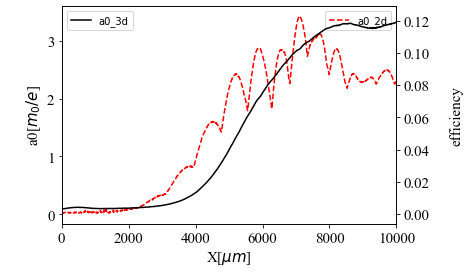

In [4]:
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
#fig = plt.figure(1)#figsize=(18,6))
#ax = fig.add_subplot(111)
fig,ax=plt.subplots()
ax2=ax.twinx()
#im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)
####

name='${e_k}$  '
####
a0_1=np.loadtxt('txt/2d/a0.txt')
a0_d1=np.loadtxt('txt/2d/a0_distance.txt')
a0_2=np.loadtxt('txt/a2_n1_T6_w8/a0.txt')
a0_d2=np.loadtxt('txt/a2_n1_T6_w8/a0_distance.txt')
eff_1=np.loadtxt('txt/2d/eff.txt')
eff_d1=np.loadtxt('txt/2d/eff_locate.txt')
eff_2=np.loadtxt('txt/a2_n1_T6_w8/eff.txt')
eff_d2=np.loadtxt('txt/a2_n1_T6_w8/eff_locate.txt')

curve_cof, = ax.plot(a0_d1, a0_1,'r--',label="a0_2d")#, color='black')
#scatter_cof = ax.plot(a0_d2, a0_2, 'r-.',label="eff_2d")#, color='blue')
curve_temp, = ax2.plot(eff_d1, eff_1,color='black',label="a0_3d")#, color='red')
#curve_load, = ax2.plot(eff_d2, eff_2,color='black',label="eff_3d")#, color='green')

#position=fig.add_axes([0.15, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#position2=fig.add_axes([0.45, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
#cb2.set_label('n_e(/m^3)',fontdict=font)

###

ax.set_xlim((0,10000))
ax.set_xlabel('X'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\na0'+ '[${m_0}/e$]',fontdict=font)

ax2.set_ylabel('\nefficiency',fontdict=font)
#cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.legend()
ax2.legend()
###


plt.show()
fig.savefig('fig/3d_r.png',dpi=400,bbox_inches = 'tight')



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01670007 0.01670007 0.01670007 ... 0.01670007 0.01670007 0.01670007]
 [0.03340013 0.03340013 0.03340013 ... 0.03340013 0.03340013 0.03340013]
 ...
 [8.2999332  8.2999332  8.2999332  ... 8.2999332  8.2999332  8.2999332 ]
 [8.31663327 8.31663327 8.31663327 ... 8.31663327 8.31663327 8.31663327]
 [8.33333333 8.33333333 8.33333333 ... 8.33333333 8.33333333 8.33333333]]


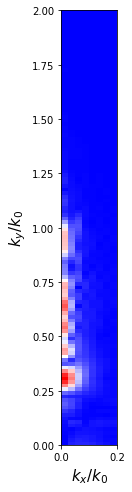

In [51]:
import constant as const
k0=2*3.14/10.6e-6
k1=2*3.14/1e-6
fs_x=2*3.14/const.delta_x/k0

fs_r=2*3.14/(40*10.6e-6/188)/k0

x=np.linspace(0,fs_x/2,int(1000/2))
r=np.linspace(0,fs_r/2,int(188/2))
R,X=np.meshgrid(r,x)
fig,ax=plt.subplots(figsize=(1,8))
#ax.set_xlim=((0,2))
#ax.set_ylim=((0,1))
k_bz2d=np.fft.fft2(bz)
#print(k_bz2d.shape)
im4=ax.pcolormesh(R,X,abs(k_bz2d[:int(const.Nx/2),:int(const.Ny/2)]),cmap=plt.get_cmap('bwr'))
#ax.set_xlim=((0,R[0,1]))
#ax.set_ylim=((0,X[0,1]))
axes = plt.gca()
axes.set_xlim([0,0.2])
axes.set_ylim([0,2])
ax.set_xlabel('${k_x}/{k_0}$',fontdict=font)
ax.set_ylabel('${k_y}/{k_0}$',fontdict=font)

print(X)
plt.show()
fig.savefig('fig/'+str(n)+'_fig2d.png',dpi=400,bbox_inches = 'tight')

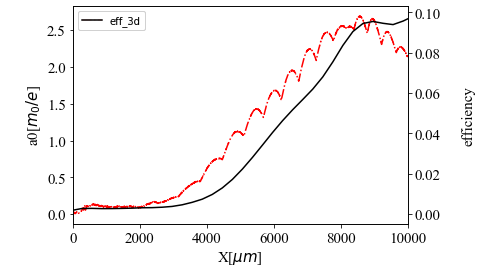

In [11]:
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
#fig = plt.figure(1)#figsize=(18,6))
#ax = fig.add_subplot(111)
fig,ax=plt.subplots()
ax2=ax.twinx()
#im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)
####

name='${e_k}$  '
####
a0_1=np.loadtxt('txt/2d/a0.txt')
a0_d1=np.loadtxt('txt/2d/a0_distance.txt')
a0_2=np.loadtxt('txt/a2_n1_T6_w8/a0.txt')
a0_d2=np.loadtxt('txt/a2_n1_T6_w8/a0_distance.txt')
eff_1=np.loadtxt('txt/2d/eff.txt')
eff_d1=np.loadtxt('txt/2d/eff_locate.txt')
eff_2=np.loadtxt('txt/a2_n1_T6_w8/eff.txt')
eff_d2=np.loadtxt('txt/a2_n1_T6_w8/eff_locate.txt')

#curve_cof, = ax.plot(a0_d1, a0_1,'r--',label="a0_2d")#, color='black')
scatter_cof = ax.plot(a0_d2, a0_2, 'r-.',label="eff_2d")#, color='blue')
#curve_temp, = ax2.plot(eff_d1, eff_1,color='black',label="a0_3d")#, color='red')
curve_load, = ax2.plot(eff_d2, eff_2,color='black',label="eff_3d")#, color='green')

#position=fig.add_axes([0.15, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#position2=fig.add_axes([0.45, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
#cb2.set_label('n_e(/m^3)',fontdict=font)

###

ax.set_xlim((0,10000))
ax.set_xlabel('X'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\na0'+ '[${m_0}/e$]',fontdict=font)

ax2.set_ylabel('\nefficiency',fontdict=font)
#cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.legend()
ax2.legend()
###


plt.show()
fig.savefig('fig/2d_r.png',dpi=400,bbox_inches = 'tight')




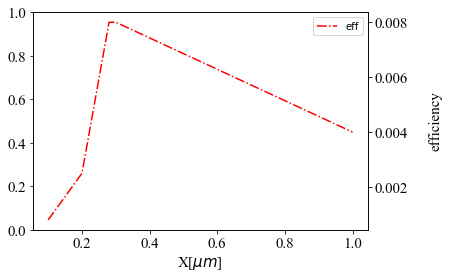

In [10]:
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
#fig = plt.figure(1)#figsize=(18,6))
#ax = fig.add_subplot(111)
fig,ax=plt.subplots()
ax2=ax.twinx()
#im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)
####

name='${e_k}$  '
####
a0_1=np.loadtxt('txt/2d/a0.txt')
a0_d1=np.loadtxt('txt/2d/a0_distance.txt')
a0_2=np.loadtxt('txt/a2_n1_T6_w8/a0.txt')
a0_d2=np.loadtxt('txt/a2_n1_T6_w8/a0_distance.txt')
eff_1=np.loadtxt('txt/2d/eff.txt')
eff_d1=np.loadtxt('txt/2d/eff_locate.txt')
eff_2=np.loadtxt('txt/a2_n1_T6_w8/eff.txt')
eff_d2=np.loadtxt('txt/a2_n1_T6_w8/eff_locate.txt')

density = [0.1,0.2,0.28,0.3,1]
eff=[0.0008,0.0025,0.008,0.008,0.004]

#curve_cof, = ax.plot(a0_d1, a0_1,'r--',label="a0_2d")#, color='black')
scatter_cof = ax2.plot(density, eff, 'r-.',label="eff")#, color='blue')
#curve_temp, = ax2.plot(eff_d1, eff_1,color='black',label="a0_3d")#, color='red')
#curve_load, = ax2.plot(eff_d2, eff_2,color='black',label="eff_3d")#, color='green')

#position=fig.add_axes([0.15, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#position2=fig.add_axes([0.45, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
#cb2.set_label('n_e(/m^3)',fontdict=font)

###

#ax.set_xlim((0,10000))
ax.set_xlabel('X'+ '[$\mu m$]',fontdict=font)
#ax.set_ylabel('\na0'+ '[${m_0}/e$]',fontdict=font)

ax2.set_ylabel('\nefficiency',fontdict=font)
#cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])
ax.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#ax.legend()
ax2.legend()
###


plt.show()
fig.savefig('fig/45TW.png',dpi=400,bbox_inches = 'tight')



